# Applied Data Science Capstone 

## Predicting severe accidents using data from Seattle

Robert Compton

# Introduction

## Problem Statement

The deaths and injuries from traffic accidents are now a world phenomenon. Many countries all over the world are greatly concerned about the growth of mortality and injury rate on the road. According to WHO, every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury. Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.

## Target Audience

Motorists, people who use public transport, police and medical personnel are usually inconvenienced greatly when accidents occur and especially severe accidents. For, severe accidents it takes quite some time and resources for the police and medical personnel to clear the scene. This thus leads to many hours of wait. Students are likely to be late for their classes, people going for interviews get late, those expected in important meetings may not be able to attend, surgeons and doctors expected to save lives run late, just to name but a few. Although severe accidents are unexpected, it would be possible to build a machine learning algorithm to predict severe accidents using various factors that are determined to be related to a severe accident occurring. This would thus serve as an automated reference to help people make decisions where and when there is a high chance of a severe accident occurring and hence plan accordingly.

## Scope

Factors influencing accident frequency may vary from the ones affecting the severity; hence, it is suggested that their analysis should be performed carefully. A set of explanatory variables, which could include: driver attributes (e.g., age and gender, whether under influence of alcohol), vehicle features (e.g., body type, vehicle age and number of vehicles involved in the accident), road characteristics (e.g., number of lanes, road surface conditions, intersection control and types of road), weather conditions, day of week, time of day, speed limit and accident characteristics (e.g., accident’s main cause) have been shown to be possible predictors of accident severity. The aim of this project is therefore to develop a machine learning algorithm that would warn motorists and other people using public transport where and when there is a high chance that a severe accident would occur and hence help them plan accordingly to avoid delays and inconveniences.

## Data Description

To evaluate the objectives of this project, a dataset by SDOT Traffic Management Divisions, Traffic Records Group in Seattle was downloaded using this link. This data is updated weekly and captures all types of collisions since 2004 to present. A record of severity of the collision, “SEVERITYCODE” is provided alongside other 39 variables related to a given collision. The dataset has a record of 221266 collisions.

Columns that are not providing much information on the model such as ID, KEY etc will be dropped. For the purpose of this project, we will explore the various variables and select features that we would use in the prediction based on their importance in predicting severity of an accident. Through feature engineering more variables will be obtained to ensure good prediction of our model.

The target variable is ‘SEVERITYCODE’, which captures the various categories of severity of the accident as follows; 0 – Unknown, 1 – prop damage, 2 – injury, 2b – severe injury and 3 – fatality.

After the data has been balanced, exploratory data analysis will be carried out to identify relationships between the various characteristics in the dataset with the target variable, severity of accident. Missing data will also be investigated and corrected. A set of predictions will also be identified to use in the prediction model. Since our data is labeled, supervised machine learning techniques will be used. The data will be split into training and test sets for training and validation. Since our target variable is likely to be binary after balancing the data, classification models will be evaluated to select the best classifier. The following classification models will be evaluated; K – nearest neighbor, Naïve Bayes, Random Forest, Logistic Regression, Gradient Boosting, XGBoost and Support Vector Machines. Various measures of accuracy such as Jaccard index, F1 score and log loss will be used to select the best classification model.

In [23]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

body = client_eefa29680b604010882e97cfc2df4b43.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-er5roxnx5wpbjv',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_cols = pd.read_csv(body)
df_cols.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [25]:
df_cols.shape

(194673, 38)

In [26]:
print(list(df_cols))

['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']


In [27]:
df_cols.SEVERITYDESC.value_counts()/len(df_cols)

Property Damage Only Collision    0.701099
Injury Collision                  0.298901
Name: SEVERITYDESC, dtype: float64

In [28]:
df_cols.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [29]:
df_cols.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [30]:
#names of columns
df_cols.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [31]:
#drop columns that are repetitions of already coded variables
df_cols.drop(['X', 'Y', 'OBJECTID','INCKEY','COLDETKEY','REPORTNO','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','SDOT_COLDESC','ST_COLDESC','STATUS'], axis=1, inplace=True)

# Data Cleaning

## Missing Values

In [32]:
df_cols.isnull().sum()

SEVERITYCODE           0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
SEVERITYCODE.1         0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [33]:
df_cols.isnull().sum()/len(df_cols)

SEVERITYCODE      0.000000
ADDRTYPE          0.009894
INTKEY            0.665747
LOCATION          0.013751
SEVERITYCODE.1    0.000000
COLLISIONTYPE     0.025191
PERSONCOUNT       0.000000
PEDCOUNT          0.000000
PEDCYLCOUNT       0.000000
VEHCOUNT          0.000000
INCDATE           0.000000
INCDTTM           0.000000
JUNCTIONTYPE      0.032511
SDOT_COLCODE      0.000000
INATTENTIONIND    0.846897
UNDERINFL         0.025088
WEATHER           0.026100
ROADCOND          0.025746
LIGHTCOND         0.026557
PEDROWNOTGRNT     0.976026
SDOTCOLNUM        0.409595
SPEEDING          0.952058
ST_COLCODE        0.000092
SEGLANEKEY        0.000000
CROSSWALKKEY      0.000000
HITPARKEDCAR      0.000000
dtype: float64

In [34]:
import sys
!{sys.executable} -m pip install missingno
import missingno as msno

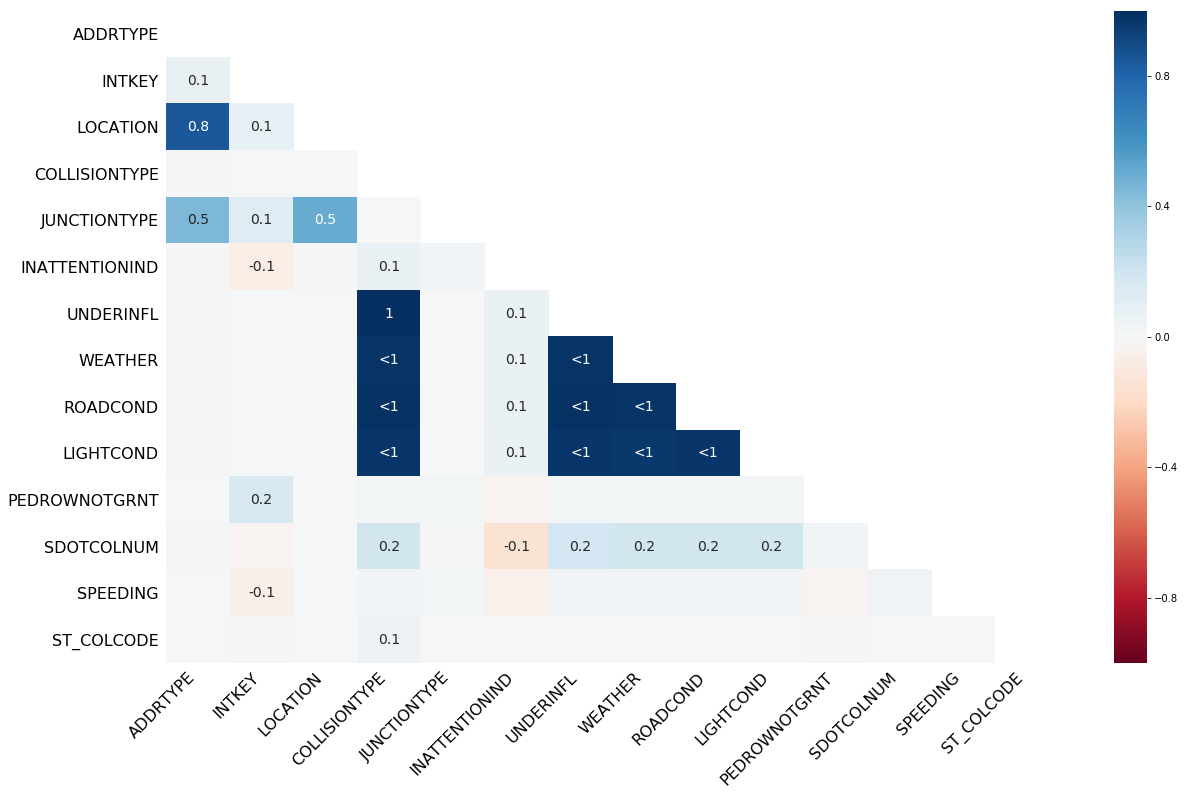

In [35]:
msno.heatmap(df_cols)

In [38]:

#delete row where SEVERITYCODE our target is na
df_cols = df_cols[df_cols['SEVERITYCODE'].notna()]
#drop more columns that have high missingness
df_cols.drop(['INTKEY','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING'], axis=1, inplace=True)

KeyError: "['INTKEY' 'INATTENTIONIND' 'PEDROWNOTGRNT' 'SDOTCOLNUM' 'SPEEDING'] not found in axis"

In [42]:
df_cols.shape

(194673, 21)

In [41]:
df_cols.isnull().sum()

SEVERITYCODE         0
ADDRTYPE          1926
LOCATION          2677
SEVERITYCODE.1       0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
JUNCTIONTYPE      6329
SDOT_COLCODE         0
UNDERINFL         4884
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
ST_COLCODE          18
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

In [43]:
#Replacing missing values with the most frequent values in each column with a missing value

# replacing na values in ADDRTYPE with Block which is the most frequent
df_cols["ADDRTYPE"].fillna("Block", inplace = True)

# replacing na values in LOCATION with BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N which is the most frequent
df_cols["LOCATION"].fillna("BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N", inplace = True)

# replacing na values in COLLISIONTYPE with Other 
df_cols["COLLISIONTYPE"].fillna("Other", inplace = True)

# replacing na values in JUNCTIONTYPE with Unknown 
df_cols["JUNCTIONTYPE"].fillna("Unknown", inplace = True)

# replacing na values in UNDERINFL with No 
df_cols["UNDERINFL"].fillna("N", inplace = True)

# replacing na values in WEATHER with Clear
df_cols["WEATHER"].fillna("Clear", inplace = True)

# replacing na values in ROADCOND with Dry
df_cols["ROADCOND"].fillna("Dry", inplace = True)

# replacing na values in LIGHTCOND with Daylight
df_cols["LIGHTCOND"].fillna("Daylight", inplace = True)

# replacing na values in ST_COLCODE with 32
df_cols["ST_COLCODE"].fillna(32, inplace = True)

# replacing na values in SDOT_COLCODE with 11.0
df_cols["SDOT_COLCODE"].fillna(11.0, inplace = True)

In [44]:
#checking our data is now complete
df_cols.isnull().sum()/len(df_cols)

SEVERITYCODE      0.0
ADDRTYPE          0.0
LOCATION          0.0
SEVERITYCODE.1    0.0
COLLISIONTYPE     0.0
PERSONCOUNT       0.0
PEDCOUNT          0.0
PEDCYLCOUNT       0.0
VEHCOUNT          0.0
INCDATE           0.0
INCDTTM           0.0
JUNCTIONTYPE      0.0
SDOT_COLCODE      0.0
UNDERINFL         0.0
WEATHER           0.0
ROADCOND          0.0
LIGHTCOND         0.0
ST_COLCODE        0.0
SEGLANEKEY        0.0
CROSSWALKKEY      0.0
HITPARKEDCAR      0.0
dtype: float64

## Change Date Variables to Date Time

In [45]:
#changing dates to a date formart
df_cols['INCDATE'] = pd.to_datetime(df_cols['INCDATE'])
df_cols['INCDTTM'] = pd.to_datetime(df_cols['INCDTTM'])

In [46]:
df_cols[['INCDATE','INCDTTM']].dtypes     #dates are now in the right format

INCDATE    datetime64[ns, UTC]
INCDTTM         datetime64[ns]
dtype: object

## Recoding Target to Binary

In [47]:
#df_cols = df_cols[df_cols.SEVERITYCODE != "0"] #drop unknown as it is uncertain

df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['0'],0)   #prop damage category
df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['1'],1)   #prop damage category
df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['2'],2)   #injury
df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['2b'],3)  #severe injury
df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['3'],4)   #fatality

df_cols.SEVERITYCODE.value_counts()/len(df_cols)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

Accidents classified in each level of severity:
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


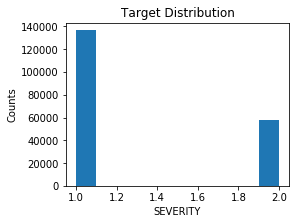

In [48]:
df_cols.SEVERITYCODE.plot.hist(figsize=(4,3))
plt.title('Target Distribution')
plt.xlabel('SEVERITY')
plt.ylabel('Counts')
print('Accidents classified in each level of severity:')
print(df_cols.SEVERITYCODE.value_counts())

## Exploratory Analysis and Data Visualization

In [49]:
#creating an ID
#df_cols.insert(0, 'ID', range(1,len(df_cols)))
df_cols.reset_index(level=0, inplace=True)
df_cols['ID'] = df_cols.index

In [50]:
df_cols.shape

(194673, 23)

In [51]:
date=df_cols[['ID','SEVERITYCODE', 'INCDATE']]
date.INCDATE.head()

0   2013-03-27 00:00:00+00:00
1   2006-12-20 00:00:00+00:00
2   2004-11-18 00:00:00+00:00
3   2013-03-29 00:00:00+00:00
4   2004-01-28 00:00:00+00:00
Name: INCDATE, dtype: datetime64[ns, UTC]

## Temporal Trends of Accidents Since 2004

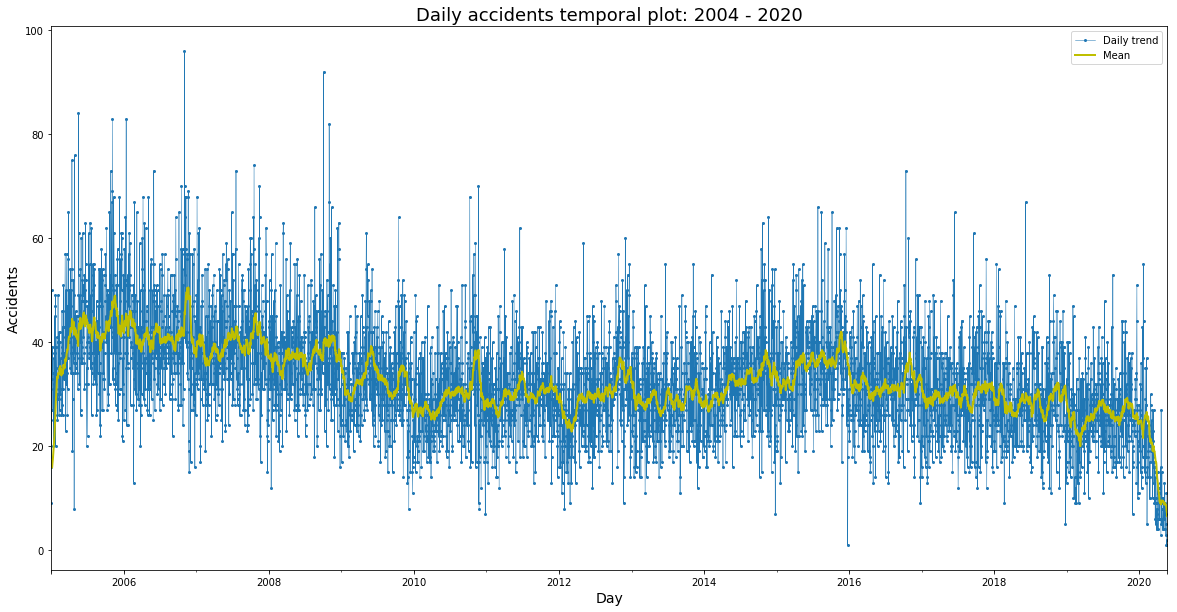

In [52]:
#Temporal plots
date['year'] = df_cols['INCDATE'].dt.year
date['month'] = df_cols['INCDATE'].dt.month
date['weekday'] = df_cols['INCDATE'].dt.weekday
date['time'] = df_cols['INCDATE'].dt.time
high_sev = date[date['SEVERITYCODE']==1]

season = date[['INCDATE', 'ID']].groupby('INCDATE').count()
season['rolling'] = season.ID.rolling(window=30).mean()
season['ID'][365*1:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')
season['rolling'][365*1:].plot(color='y', linewidth=2, label='Mean')
plt.title('Daily accidents temporal plot: 2004 - 2020', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

plt.legend()
plt.show()

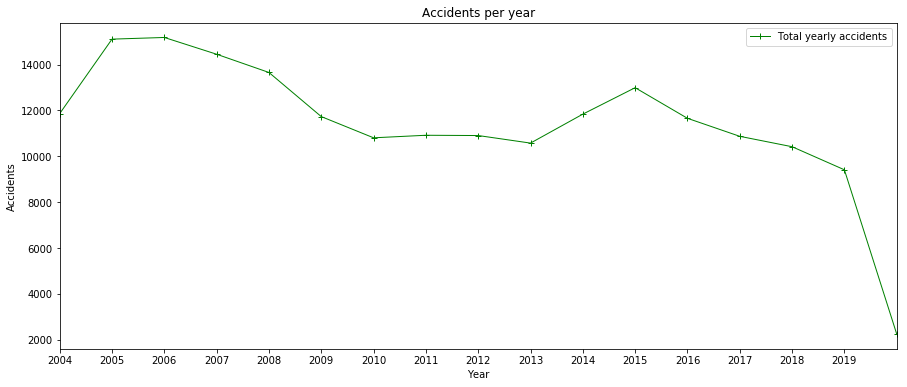

In [53]:
#Accidents each year
yearly = date[['year', 'ID']].groupby('year').count()
yearly['ID'].plot.line(figsize=(15,6), marker='+', linewidth=1, color='green', label='Total yearly accidents')
plt.title('Accidents per year')
plt.xticks(range(2004,2020))
plt.xlim(2004,2020)
plt.ylabel('Accidents')
plt.xlabel('Year')
plt.legend()

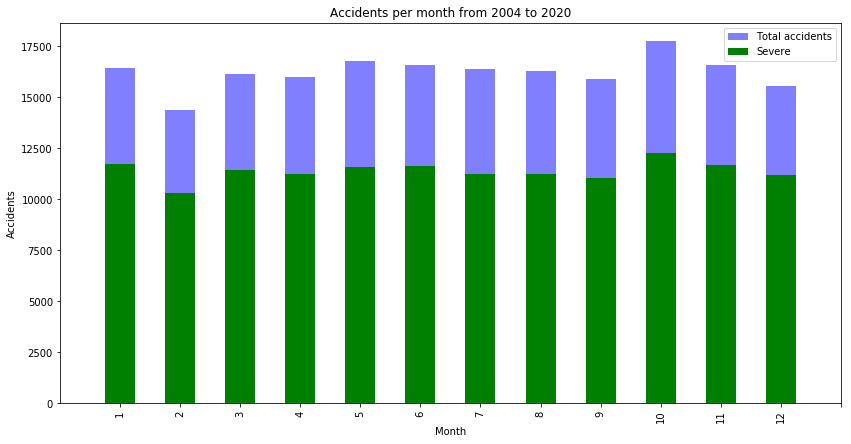

In [54]:
#By month

monthly = date[['month', 'ID']].groupby(['month']).count()
monthly['high_sev'] = high_sev[['month', 'ID']].groupby(['month']).count()


monthly['ID'].plot.bar(figsize=(14,7), alpha=0.5, color='b', label='Total accidents')
monthly['high_sev'].plot.bar(color='g', label='Severe')

plt.title('Accidents per month from 2004 to 2020')
plt.xticks(range(13))
plt.xlim(-1,12)
# plt.ylim(50000,85000)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

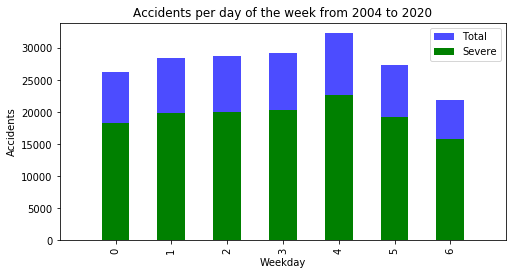

In [55]:
#By day of the week
weekday = date[['weekday', 'ID']].groupby('weekday').count()
weekday['high_sev'] = high_sev[['weekday', 'ID']].groupby(['weekday']).count()
weekday['ID'].plot.bar(figsize=(8,4), alpha=0.7, color='b', label='Total')
weekday['high_sev'].plot.bar(color='g', label='Severe')

plt.title('Accidents per day of the week from 2004 to 2020')
plt.xticks(range(7))
plt.xlim(-1,7)
# plt.ylim(75000,150000)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()

In [56]:
#Creating day,weekday, month and year
df_cols['year'] = df_cols['INCDATE'].dt.year
df_cols['month'] = df_cols['INCDATE'].dt.month
df_cols['weekday'] = df_cols['INCDATE'].dt.weekday

In [57]:
df_cols.drop(['index','ID','INCDATE','INCDTTM'], axis=1, inplace=True)
df_cols.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR',
       'year', 'month', 'weekday'],
      dtype='object')

## Transforming Categorical Variables

In [58]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_cols["LOCATION1"] = lb_make.fit_transform(df_cols["LOCATION"])
df_cols[["LOCATION", "LOCATION1"]].head(11)

,LOCATION,LOCATION1
0,5TH AVE NE AND NE 103RD ST,8793
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,10707
2,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,8049
3,2ND AVE BETWEEN MARION ST AND MADISON ST,4647
4,SWIFT AVE S AND SWIFT AV OFF RP,22787
5,24TH AVE NW AND NW 85TH ST,3630
6,DENNY WAY AND WESTLAKE AVE,12194
7,BROADWAY AND E PIKE ST,11368
8,PINE ST BETWEEN 5TH AVE AND 6TH AVE,19112
9,41ST AVE SW AND SW THISTLE ST,7181


In [59]:
df_cols["COLLISIONTYPE1"] = lb_make.fit_transform(df_cols["COLLISIONTYPE"])
df_cols[["COLLISIONTYPE", "COLLISIONTYPE1"]].head(11)

,COLLISIONTYPE,COLLISIONTYPE1
0,Angles,0
1,Sideswipe,9
2,Parked Car,5
3,Other,4
4,Angles,0
5,Angles,0
6,Angles,0
7,Cycles,1
8,Parked Car,5
9,Angles,0


In [60]:
df_cols["JUNCTIONTYPE1"] = lb_make.fit_transform(df_cols["JUNCTIONTYPE"])
df_cols[["JUNCTIONTYPE", "JUNCTIONTYPE1"]].head(11)

,JUNCTIONTYPE,JUNCTIONTYPE1
0,At Intersection (intersection related),1
1,Mid-Block (not related to intersection),4
2,Mid-Block (not related to intersection),4
3,Mid-Block (not related to intersection),4
4,At Intersection (intersection related),1
5,At Intersection (intersection related),1
6,At Intersection (intersection related),1
7,At Intersection (intersection related),1
8,Mid-Block (not related to intersection),4
9,At Intersection (intersection related),1


In [61]:
df_cols["LIGHTCOND1"] = lb_make.fit_transform(df_cols["LIGHTCOND"])
df_cols[["LIGHTCOND", "LIGHTCOND1"]].head(11)

,LIGHTCOND,LIGHTCOND1
0,Daylight,5
1,Dark - Street Lights On,2
2,Daylight,5
3,Daylight,5
4,Daylight,5
5,Daylight,5
6,Daylight,5
7,Daylight,5
8,Daylight,5
9,Daylight,5


In [62]:
df_cols["ROADCOND1"] = lb_make.fit_transform(df_cols["ROADCOND"])
df_cols[["ROADCOND", "ROADCOND1"]].head(11)

,ROADCOND,ROADCOND1
0,Wet,8
1,Wet,8
2,Dry,0
3,Dry,0
4,Wet,8
5,Dry,0
6,Wet,8
7,Dry,0
8,Dry,0
9,Dry,0


In [63]:
df_cols["WEATHER1"] = lb_make.fit_transform(df_cols["WEATHER"])
df_cols[["WEATHER", "WEATHER1"]].head(11)

,WEATHER,WEATHER1
0,Overcast,4
1,Raining,6
2,Overcast,4
3,Clear,1
4,Raining,6
5,Clear,1
6,Raining,6
7,Clear,1
8,Clear,1
9,Clear,1


In [64]:
df_cols["HITPARKEDCAR1"] = lb_make.fit_transform(df_cols["HITPARKEDCAR"])
df_cols[["HITPARKEDCAR", "HITPARKEDCAR1"]].head(11)

,HITPARKEDCAR,HITPARKEDCAR1
0,N,0
1,N,0
2,N,0
3,N,0
4,N,0
5,N,0
6,N,0
7,N,0
8,N,0
9,N,0


## One Hot Encoding for ADDRTYPE

In [65]:
df_cols.ADDRTYPE.value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [66]:
df_cols=pd.concat([df_cols,pd.get_dummies(df_cols['ADDRTYPE'])], axis=1)
df_cols[['ADDRTYPE','Block','Intersection','Alley']].head()

,ADDRTYPE,Block,Intersection,Alley
0,Intersection,0,1,0
1,Block,1,0,0
2,Block,1,0,0
3,Block,1,0,0
4,Intersection,0,1,0


In [67]:
df_cols['UNDERINFL'] = df_cols['UNDERINFL'].replace(['N'],0)   
df_cols['UNDERINFL'] = df_cols['UNDERINFL'].replace(['0'],0)
df_cols['UNDERINFL'] = df_cols['UNDERINFL'].replace(['Y'],1)
df_cols['UNDERINFL'] = df_cols['UNDERINFL'].replace(['1'],1)

In [68]:
df_cols.UNDERINFL.value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [69]:
#Dropping the columns that have been transformed to new ones
df_cols.drop(['ADDRTYPE','LOCATION','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR'], axis=1, inplace=True)

In [70]:
corr = df_cols.corr()
corr.style.background_gradient(cmap='coolwarm')

,SEVERITYCODE,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,SEGLANEKEY,CROSSWALKKEY,year,month,weekday,LOCATION1,COLLISIONTYPE1,JUNCTIONTYPE1,LIGHTCOND1,ROADCOND1,WEATHER1,HITPARKEDCAR1,Alley,Block,Intersection
SEVERITYCODE,1,1,0.130949,0.246338,0.214218,-0.0546858,0.188905,0.0443766,0.104276,0.175093,0.0211393,0.00472989,-0.0152457,-0.0364942,-0.126336,-0.218882,-0.0618343,-0.0449883,-0.105236,-0.101498,-0.02579,-0.195147,0.199089
SEVERITYCODE.1,1,1,0.130949,0.246338,0.214218,-0.0546858,0.188905,0.0443766,0.104276,0.175093,0.0211393,0.00472989,-0.0152457,-0.0364942,-0.126336,-0.218882,-0.0618343,-0.0449883,-0.105236,-0.101498,-0.02579,-0.195147,0.199089
PERSONCOUNT,0.130949,0.130949,1,-0.023464,-0.0388092,0.380523,-0.12896,0.0224197,-0.0213834,-0.0322582,-0.0640189,-0.000646163,0.0580628,-0.0151823,0.015222,-0.0913355,-0.0427791,-0.0237622,-0.0557342,-0.0527656,-0.0252279,-0.0636572,0.067153
PEDCOUNT,0.246338,0.246338,-0.023464,1,-0.0169203,-0.261285,0.260393,0.0165921,0.00181033,0.565326,0.024348,0.00568179,-0.0196433,-0.0372524,0.0930351,-0.128417,-0.0422932,0.0078714,-0.00970301,-0.0352643,0.00380907,-0.145026,0.144936
PEDCYLCOUNT,0.214218,0.214218,-0.0388092,-0.0169203,1,-0.253773,0.382521,-0.0164009,0.453657,0.10982,0.0342809,0.00684441,-0.0249639,-0.0187118,-0.212772,-0.0903379,0.00989349,-0.0472541,-0.0512367,-0.0301873,-0.00659389,-0.0842717,0.0853772
VEHCOUNT,-0.0546858,-0.0546858,0.380523,-0.261285,-0.253773,1,-0.365814,0.00660871,-0.122941,-0.200526,-0.10273,0.0117127,0.0110019,0.00798361,0.106166,0.0567322,0.00375823,0.0403519,0.0482489,0.048845,-0.0246219,0.0765664,-0.073548
SDOT_COLCODE,0.188905,0.188905,-0.12896,0.260393,0.382521,-0.365814,1,0.106783,0.206835,0.189518,-0.0378653,0.000726387,0.0137031,0.0311578,-0.00245717,-0.0735132,-0.164168,-0.0390525,-0.110749,-0.0951443,-0.0945294,0.0321854,-0.0198544
UNDERINFL,0.0443766,0.0443766,0.0224197,0.0165921,-0.0164009,0.00660871,0.106783,1,-0.00836021,-0.00947381,-0.00617324,0.00159487,0.0748998,0.00637229,0.00451279,0.0386524,-0.218037,-0.00895499,-0.0389697,0.0101527,0.00227957,0.0414103,-0.0418273
SEGLANEKEY,0.104276,0.104276,-0.0213834,0.00181033,0.453657,-0.122941,0.206835,-0.00836021,1,-0.00342176,0.0279498,0.00355673,-0.0133608,-0.012003,-0.0969664,-0.038856,0.00342264,-0.0218451,-0.0256283,-0.0151437,-0.00505617,-0.0382525,0.0390254
CROSSWALKKEY,0.175093,0.175093,-0.0322582,0.565326,0.10982,-0.200526,0.189518,-0.00947381,-0.00342176,1,0.0556484,0.005874,-0.0168872,-0.041441,0.032416,-0.156794,-0.0236692,0.00894695,-0.00599876,-0.0265578,-0.00842368,-0.17671,0.178318


In [71]:
df_cols.dtypes

SEVERITYCODE       int64
SEVERITYCODE.1     int64
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
SDOT_COLCODE       int64
UNDERINFL          int64
ST_COLCODE        object
SEGLANEKEY         int64
CROSSWALKKEY       int64
year               int64
month              int64
weekday            int64
LOCATION1          int64
COLLISIONTYPE1     int64
JUNCTIONTYPE1      int64
LIGHTCOND1         int64
ROADCOND1          int64
WEATHER1           int64
HITPARKEDCAR1      int64
Alley              uint8
Block              uint8
Intersection       uint8
dtype: object

In [72]:
df_cols.columns

Index(['SEVERITYCODE', 'SEVERITYCODE.1', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'UNDERINFL', 'ST_COLCODE',
       'SEGLANEKEY', 'CROSSWALKKEY', 'year', 'month', 'weekday', 'LOCATION1',
       'COLLISIONTYPE1', 'JUNCTIONTYPE1', 'LIGHTCOND1', 'ROADCOND1',
       'WEATHER1', 'HITPARKEDCAR1', 'Alley', 'Block', 'Intersection'],
      dtype='object')

In [74]:
Features = df_cols[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY',  'COLLISIONTYPE1', 'JUNCTIONTYPE1', 'WEATHER1', 'HITPARKEDCAR1']]

In [75]:
X = Features
X[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,COLLISIONTYPE1,JUNCTIONTYPE1,WEATHER1,HITPARKEDCAR1
0,2,0,0,11,0,0,0,1,4,0
1,2,0,0,16,0,0,9,4,6,0
2,4,0,0,14,0,0,5,4,4,0
3,3,0,0,11,0,0,4,4,1,0
4,2,0,0,11,0,0,0,1,6,0


In [76]:
y = df_cols['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

## Normalize Data

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

## Model Development

Here 5 classification models will be fit and compared. These include

1. KNN
2. Decision Tree
3. SVM
4. Logistic Regression
5. Random Forests

The models will be evaluated to select the best classifier

In [ ]:
# Evaluation Metrices
from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss

In [ ]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify=y)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
meanAcc = np.zeros((Ks-1))
stdAcc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    meanAcc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    stdAcc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

meanAcc

plt.plot(range(1,Ks),meanAcc,'g')
plt.fill_between(range(1,Ks),meanAcc - 1 * stdAcc,meanAcc + 1 * stdAcc, alpha=0.10)
plt.legend(('Accuracy ', 'CI'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", meanAcc.max(), "with k=", meanAcc.argmax()+1)

In [ ]:
# train model with k=1
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
neigh

predKNN=neigh.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print('CONFUSION_MATRIX :\n')
print(confusion_matrix(predKNN,y_test))
print('\n')
print('REPORT :\n')
print(classification_report(predKNN,y_test))
    
print('ACCURACY :')
metrics.accuracy_score(predKNN,y_test)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

loansTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

loansTree.fit(X_train,y_train)

predDT = loansTree.predict(X_test)
predDT

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print('CONFUSION_MATRIX :\n')

print(confusion_matrix(predDT,y_test))

In [ ]:
print('REPORT :\n')
print(classification_report(predDT,y_test))

print('ACCURACY :\n')
metrics.accuracy_score(predDT,y_test)

## SVM

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

predSVM = clf.predict(X_test)
predSVM

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print('CONFUSION_MATRIX :\n')

print(confusion_matrix(predSVM,y_test))

In [ ]:
print('REPORT :\n')
print(classification_report(predSVM,y_test))

print('ACCURACY :\n')
metrics.accuracy_score(predSVM,y_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(C=0.01).fit(X_train,y_train)
logR

predLR=logR.predict(X_test)
predLR

In [ ]:
print('CONFUSION_MATRIX :\n')

print(confusion_matrix(predLR,y_test))

In [ ]:
print('REPORT :\n')
print(classification_report(predLR,y_test))

print('ACCURACY :\n')
metrics.accuracy_score(predLR,y_test)

## Model Evaluation

In [ ]:
#Jaccard index

#KNN
knn_yhat = neigh.predict(X_test)
jc1 = (jaccard_similarity_score(y_test, knn_yhat))

#Decision Tree
dt_yhat = loansTree.predict(X_test)
jc2 = (jaccard_similarity_score(y_test, dt_yhat))

#SVM
svm_yhat = clf.predict(X_test)
jc3 = (jaccard_similarity_score(y_test, svm_yhat))

#Logistic Regression
lr_yhat = logR.predict(X_test)
jc4 = (jaccard_similarity_score(y_test, lr_yhat))

list_jc = [jc1, jc2, jc3, jc4]
list_jc

In [ ]:
#F1 score

#KNN
fs1 = (f1_score(y_test, knn_yhat,average='weighted'))

#Desision Tree
fs2 = (f1_score(y_test, dt_yhat, average='weighted'))

#SVM
fs3 = (f1_score(y_test, svm_yhat, average='weighted'))

#Logistic Regression
fs4 = (f1_score(y_test, lr_yhat, average='weighted'))

list_fs = [fs1, fs2, fs3, fs4]
list_fs

In [ ]:
##log loss

LR_yhat_prob = logR.predict_proba(X_test)

list_ll = ['NA', 'NA', 'NA',(log_loss(y_test, LR_yhat_prob))]
list_ll